Перед началом выполнения, сделайте копию этого colab'а. Чтобы сделать копию нужно в пункте меню Файл выбрать "Сохранить копию на диске"

# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
import numpy as np

In [ ]:
def linan(l_1, l_2):
  l_1_sp = l_1.split()
  l_2_sp = l_2.split()

  coef_m = np.array([[int(l_1_sp[0]), int(l_1_sp[1])], [int(l_2_sp[0]), int(l_2_sp[1])]]) # Матрица (левая часть системы)
  b_m = np.array([int(l_1_sp[2]), int(l_2_sp[2])]) # b_1 b_2

  f = np.linalg.solve(coef_m, b_m) 

  return f

In [ ]:
linan('4 1 5', '5 8 40')

array([0., 5.])

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [ ]:
def decorate_matrix(n):
    matrix = np.zeros((n, n))
    matrix[0] = 1
    matrix[-1] = 1
    matrix[0:-1, 0] = 1 
    matrix[0:-1, -1] = 1 
    return matrix

In [ ]:
decorate_matrix(5)

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
from scipy.optimize import golden

In [ ]:
a = 3
b = 4
def f(x): #1
  return (x+a)**2 - b 

def g(x): 
  return abs(f(x))

In [ ]:
min_f = round(golden(f, full_output=False), 3)
min_g_1 = round(golden(g, brack=(-10, -4), full_output=False), 3)
min_g_2 = round(golden(g, brack=(-1, 10), full_output=False), 3)

print(min_f, min_g_2, min_g_1)


-3.0 -1 -5.0


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

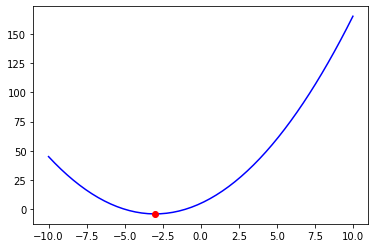

In [ ]:
x = np.linspace(-10, 10)
plt.plot(x, f(x), color='blue')
plt.plot(min_f, f(min_f), marker="o", color='red')

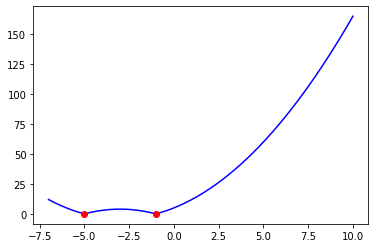

In [ ]:
x = np.linspace(-7, 10)
plt.plot(x, g(x), color='blue')
plt.plot(min_g_2, g(min_g_2), marker="o", color='red')
plt.plot(min_g_1, g(min_g_1), marker="o", color='red')

plt.show()

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 

In [ ]:
from math import factorial #1

In [ ]:
def bernul(n, p, k):
  c_k_n = factorial(n) / (factorial(k)*factorial(n-k))
  p_b = c_k_n * (p**k) * ((1-p)**(n-k))
  return p_b

In [ ]:
p = bernul(10, 0.5, 10) * 2 # вероятнсоть для одного человека - орел или решка(X2)

l = 1 -((1-p) ** 1000)

print(round(l, 3))

0.858


2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 

In [ ]:
a_1 = bernul(10, 0.5, 8) # 8 раз #2
a_2 = bernul(10, 0.5, 9) # 9 раз
a_3 = bernul(10, 0.5, 10) # 10 раз

a_all = (a_1 + a_2 + a_3) * 2 # орел + решка (X2)

p_2 = 1 - (1-a_all) ** 1000 # стремится к 1

print(p_2)

1.0


3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
round(bernul(1000, a_3, 3) * 2, 4)  #3

0.1168